<a href="https://colab.research.google.com/github/Dilan-Kaibili/regression/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,ID
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,4
4,5.0,3.6,1.4,0.2,Iris-setosa,5


In [ ]:
df.shape

(150, 6)

In [ ]:
df=df.drop(columns=['ID'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Name'].value_counts()

,count
Name,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isna().sum()

,0
SepalLength,0
SepalWidth,0
PetalLength,0
PetalWidth,0
Name,0


<Axes: >

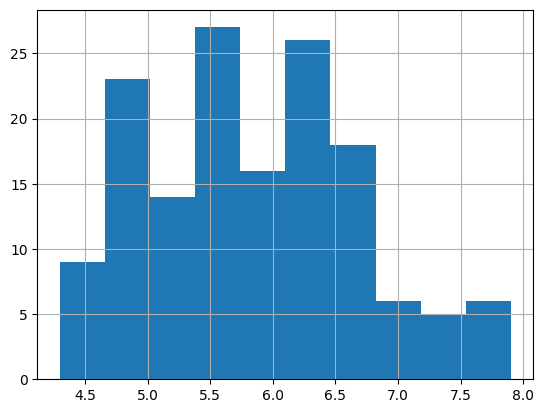

In [ ]:
df['SepalLength'].hist()

<Axes: >

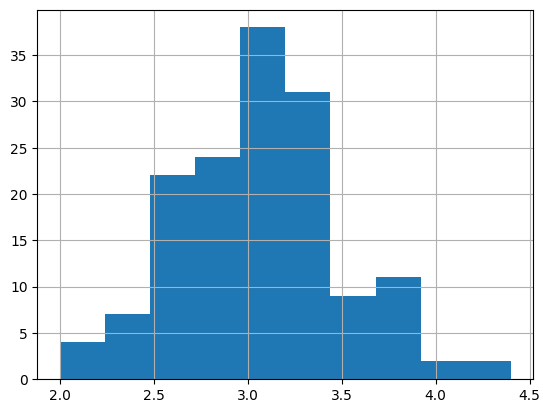

In [ ]:
df['SepalWidth'].hist()

<Axes: >

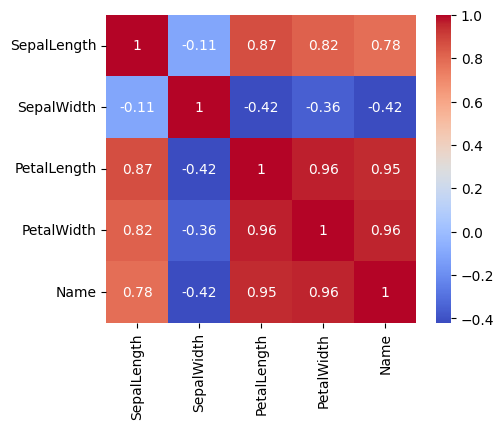

In [31]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [ ]:
px.scatter(df,x='Name',y='PetalWidth')

In [ ]:
px.line(df,x='Name',y='PetalWidth')

In [ ]:
px.scatter(df,x='Name',y='PetalLength')

In [ ]:
px.scatter(df,x='Name',y='SepalLength')

In [ ]:
px.scatter(df,x='Name',y='SepalWidth')

In [ ]:
px.scatter_matrix(df,color='Name',title='Iris',dimensions=['SepalLength','SepalWidth','PetalLength','PetalWidth'])

In [ ]:
color=['red','orange','blue']
Name=['Iris-virginica','Iris-versicolor','Iris-setosa']

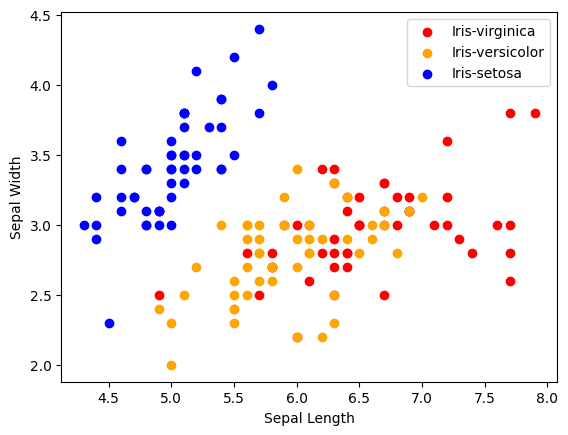

In [ ]:
for i in range(3):
  x=df[df['Name']==Name[i]]
  plt.scatter(x['SepalLength'],x['SepalWidth'],color=color[i],label=Name[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Name'] = le.fit_transform(df['Name'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Name'])
y=df['Name']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 96.66666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


In [ ]:
data = 8,3.755,7,2.1
data_array = np.array([data])
data_array
predic = model.predict(data_array)
predic

array([2])

In [ ]:
catagory = ['Iris-Satosa','Iris-Versicolor','Iris-Virginica']
print(catagory[int(predic[0])])

Iris-Virginica


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

